In [ ]:
#DIESE DATEI KANN IGNORIERT WERDEN

In [1]:
import pandas
from ots_eval.stability_evaluation.close import CLOSE
import numpy as np
import csv
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6
import seaborn as sns

%matplotlib inline

In [ ]:
data1 = pandas.read_csv("datasets/generated_1d_data.csv")
data1.head()

In [ ]:
data1.info()

In [ ]:
plt.figure(figsize=(15,10))
_ = plt.plot(data1['time'], data1['feature1'],
            marker='.', linewidth=0, color='#128128')
_ = plt.grid(which='major', color='#cccccc', alpha=0.45)
_ = plt.title('Test Data', family='Arial', fontsize=12)
_ = plt.xlabel('Time')
_ = plt.ylabel('feature1')
_ = plt.show()

In [ ]:
sns.pairplot(data1)

In [ ]:
dbscan_data = data1[['time', 'feature1']]
dbscan_data = dbscan_data.values.astype('float32', copy=False)
dbscan_data

In [ ]:
dbscan_data_scaler = StandardScaler()
dbscan_data = dbscan_data_scaler.fit_transform(dbscan_data)
dbscan_data

In [ ]:
model = DBSCAN(eps=0.25, min_samples=3).fit(dbscan_data)
model

In [ ]:
outliers_df = data1[model.labels_ == -1]
clusters_df = data1[model.labels_ != -1]

colors = model.labels_
colors_clusters = colors[colors != -1]
color_outliers = 'black'

clusters = Counter(model.labels_)
print(clusters)
print(data1[model.labels_ == -1].head())
print('Number of clusters = {}' .format(len(clusters)-1))

In [ ]:
model.labels_

In [ ]:
clusters_df

In [ ]:
outliers_df

In [ ]:
df = pandas.read_csv('datasets/generated_1d_data.csv')
df_list = df.values.tolist()
print(df_list)

In [ ]:
t1.append(pd.DataFrame([[7,8,9]], columns=["hans","peter","james"])) #beispiel append fuer df

In [ ]:
plt.scatter(d1[["time"]], d1[["feature1"]])

In [414]:
import warnings
warnings.filterwarnings('ignore')

from pandas.core.common import flatten
import random
import statistics
import pandas as pd
import numpy as np
from plotnine import * 
from ots_eval.stability_evaluation.close import CLOSE

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from matplotlib import pyplot as plt

%matplotlib inline

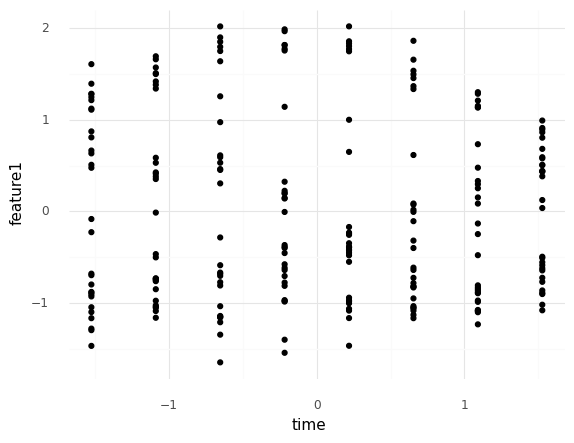

<ggplot: (95132176162)>

In [415]:
d1 = pd.read_csv("datasets/generated_1d_data.csv")

z = StandardScaler()
d1[["time", "feature1"]] = z.fit_transform(d1[["time", "feature1"]])

ggplot(d1, aes(x = "time", y = "feature1")) + geom_point() + theme_minimal()

In [416]:
#Nicht Vorhandene Werte von Zeitreihen simulieren
sample_df = d1.sample(frac =.8)

In [417]:
#defekte (None) Werte von Zeitreihe simulieren
dfupdate = sample_df.sample(frac = .2).index
sample_df.loc[dfupdate, "feature1"] = np.NaN

In [418]:
#alle Rows mit NaN Werten droppen
sample_df.dropna(subset=["object_id", "time", "feature1"], inplace=True)

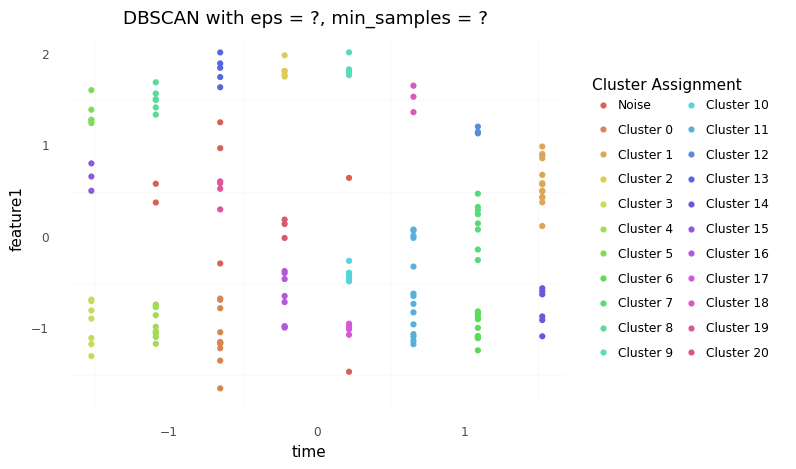

<ggplot: (95134694786)>

In [420]:
test_db1 = DBSCAN(eps = 0.35, min_samples = 3).fit(sample_df[["time", "feature1"]])

labsList = ["Noise"]
labsList = labsList + ["Cluster " + str(i) for i in range(0, len(set(test_db1.labels_))-1)]

sample_df["assignments"] = test_db1.labels_

(ggplot(sample_df, aes(x = "time", y = "feature1", color = "factor(assignments)")) + geom_point() + theme_minimal() +
    scale_color_discrete(name = "Cluster Assignment",
                        labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = ?, min_samples = ? "))

In [412]:
df_clustered = sample_df.loc[(sample_df.assignments >= 0)]

silhouette_score(df_clustered[["time", "feature1"]], df_clustered[["assignments"]])

0.7246042521333533

In [413]:
rater = CLOSE(sample_df[['object_id', 'time', 'assignments', 'feature1']], 'mae', 2, jaccard=True, weighting=True, exploitation_term=True)
print(rater.rate_clustering())
rater = CLOSE(sample_df[['object_id', 'time', 'assignments', 'feature1']], 'exploit', 2, jaccard=True, weighting=True)
print(rater.rate_time_clustering())

0.0
0.0


In [423]:
#Spalten die gescaled wurden wieder zurückscalen
d1[["time", "feature1"]] = z.inverse_transform(d1[["time", "feature1"]])
sample_df[["time", "feature1"]] = z.inverse_transform(sample_df[["time", "feature1"]])

In [ ]:
#Allgemeine Methoden

In [366]:
def get_missing_rows(dataframe, df_id_name, df_time_name):  #df_feature_name
    id_list = list(set(dataframe[df_id_name]))
    time_list = list(set(dataframe[df_time_name]))
    result = []

    for id_elem in id_list:
        for time_elem in time_list:
            if dataframe[(dataframe[df_id_name] == id_elem) & (dataframe[df_time_name] == time_elem)].empty: # | dataframe[(dataframe[df_feature_name] == None)]
                result.append([id_elem, time_elem])
    
    return result  

In [367]:
def id_assignments_list(dataframe, missing_id_list, df_id_name, df_cluster_name):
    id_assignment_list = []
    needed_assignments = []

    for id_elem in missing_id_list:
        needed_assignments = list(set(getattr(dataframe[dataframe[df_id_name] == id_elem], df_cluster_name)))
        if -1 in needed_assignments:
            needed_assignments.remove(-1)
        id_assignment_list.append([id_elem, list(needed_assignments)])
        needed_assignments.clear()

    return id_assignment_list

In [368]:
def id_mfcm_list(missing_id_list, id_assignment_list):
    most_frequent_cluster_member = []
    mfcm_ids = []
    current_count = 0
    biggest_count = 0

    for missing_id_elem in missing_id_list:
        for id_elem, assignments_elem in id_assignment_list:
            if missing_id_elem != id_elem:
                current_count = len(set(id_assignment_list[missing_id_list.index(missing_id_elem)][1]).intersection(assignments_elem))
                if current_count == biggest_count:
                    mfcm_ids.append(id_elem)
                if current_count > biggest_count:
                    biggest_count = current_count
                    mfcm_ids.clear()
                    mfcm_ids.append(id_elem)
        most_frequent_cluster_member.append([missing_id_elem, list(mfcm_ids)])
        mfcm_ids.clear()
        biggest_count = 0

    return most_frequent_cluster_member

In [ ]:
#Most_Frequent_Cluster_Member

In [369]:
def most_frequent_cluster_member(dataframe, df_id_name, df_time_name, df_feature_name, df_cluster_name):
    missing_rows = get_missing_rows(dataframe, df_id_name, df_time_name)
    missing_id_list = sorted(list(set([item[0] for item in missing_rows])))
    id_assignment_list = id_assignments_list(dataframe, missing_id_list, df_id_name, df_cluster_name)
    mfcm = id_mfcm_list(missing_id_list, id_assignment_list)
    mfcm_id_list = [item[0] for item in mfcm]
    middle = []
    result = []
    
    for missing_id_elem, missing_time_elem in missing_rows:
        for cluster_member in mfcm[mfcm_id_list.index(missing_id_elem)][1]:
            if getattr(dataframe[(dataframe[df_id_name] == cluster_member) & (dataframe[df_time_name] == missing_time_elem)], df_feature_name).values:
                middle.append(getattr(dataframe[(dataframe[df_id_name] == cluster_member) & (dataframe[df_time_name] == missing_time_elem)], df_feature_name).values)
        if middle:
            result.append([missing_id_elem, missing_time_elem, list(statistics.median(middle))])
            middle.clear()
        else:
            result.append([missing_id_elem, missing_time_elem, ["-----------------"]])
        
    return result

In [ ]:
#Pre_And_Post_Feature_Analysis

In [370]:
def pre_features(dataframe, list_of_ids, time, df_id_name, df_time_name, df_feature_name):
    df_times = list(set(getattr(dataframe, df_time_name)))
    df_times.reverse()
    index = df_times.index(time)
    pre_features = []
    
    for id_elem in list_of_ids:
        for time_elem in df_times[index+1:]:
            row = dataframe[(dataframe[df_id_name] == id_elem) & (dataframe[df_time_name] == time_elem)]
            if not row.empty:
                if not getattr(row, df_feature_name).values is None:
                    pre_features.append(getattr(row, df_feature_name).values)
                    break
    
    return pre_features

In [371]:
def post_features(dataframe, list_of_ids, time, df_id_name, df_time_name, df_feature_name):
    df_times = list(set(getattr(dataframe, df_time_name)))
    index = df_times.index(time)
    post_features = []
    
    for id_elem in list_of_ids:
        for time_elem in df_times[index+1:]:
            row = dataframe[(dataframe[df_id_name] == id_elem) & (dataframe[df_time_name] == time_elem)]
            if not row.empty:
                if not getattr(row, df_feature_name).values is None:
                    post_features.append(getattr(row, df_feature_name).values)
                    break
    
    return post_features

In [372]:
def pre_and_post_features(dataframe, list_of_ids, time, df_id_name, df_time_name, df_feature_name):
    result = []
    
    result.extend(pre_features(dataframe, list_of_ids, time, df_id_name, df_time_name, df_feature_name))
    result.extend(post_features(dataframe, list_of_ids, time, df_id_name, df_time_name, df_feature_name))

    return result

In [373]:
def pre_and_post_clustering_analysis(dataframe, df_id_name, df_time_name, df_feature_name, df_cluster_name):
    missing_rows = get_missing_rows(dataframe, df_id_name, df_time_name)
    missing_id_list = sorted(list(set([item[0] for item in missing_rows])))
    id_assignment_list = id_assignments_list(dataframe, missing_id_list, df_id_name, df_cluster_name)
    mfcm = id_mfcm_list(missing_id_list, id_assignment_list)
    result = []
    
    for id_elem, time_elem in missing_rows:
        for index in range(len(mfcm)):
            if id_elem == mfcm[index][0]:
                result.append([id_elem, time_elem, statistics.median(pre_and_post_features(dataframe, list(flatten(mfcm[index])), time_elem, df_id_name, df_time_name, df_feature_name)).tolist()])
    
    return result
            

In [ ]:
#Median_of_All

In [374]:
def median_of_all(dataframe, df_id_name, df_time_name, df_feature_name, df_cluster_name):
    missing_rows = get_missing_rows(dataframe, df_id_name, df_time_name)
    missing_time_list = sorted(list(set([item[1] for item in missing_rows])))
    medians = median_of_clusterings(dataframe, missing_time_list, df_time_name, df_feature_name, df_cluster_name)
    median_index_list = [item[0] for item in medians]
    result = []
    
    for id_elem, time_elem in missing_rows:
        result.append([id_elem, time_elem, medians[median_index_list.index(time_elem)][1]])
    
    return result

In [425]:
def median_of_clusterings_test(dataframe, df_time_name, df_feature_name, df_cluster_name):
    middle = []
    result = []
    assignments_list = list(set(getattr(dataframe, df_cluster_name).values))
    
    for cluster_elem in assignments_list:
        if cluster_elem != -1:
            for feature_elem in list(set(getattr(dataframe[dataframe[df_cluster_name] == cluster_elem], df_feature_name).values)):
                if feature_elem:
                    middle.append(feature_elem)
            result.append([cluster_elem, statistics.median(middle)])
            middle.clear()
   
    return result

In [427]:
median_of_clusterings_test(sample_df, "time", "feature1", "assignments")

[[0, 0.18314071354948824],
 [1, 0.6280078283166631],
 [2, 0.9462315031283282],
 [3, 0.25112920864106303],
 [4, 0.22825983686308948],
 [5, 0.8093709561361365],
 [6, 0.2251670540949069],
 [7, 0.531221037024741],
 [8, 0.8659579360850846],
 [9, 0.9470080956261244],
 [10, 0.3773201463972493],
 [11, 0.3036630347741817],
 [12, 0.7752480954841056],
 [13, 0.9552811563358716],
 [14, 0.28820950642517756],
 [15, 0.65],
 [16, 0.3060368967684405],
 [17, 0.22639015021344178],
 [18, 0.8739906204782788],
 [19, 0.6235004494072334],
 [20, 0.5167536453763221]]

In [437]:
def median_of_all_test(dataframe, df_id_name, df_time_name, df_feature_name, df_cluster_name):
    missing_rows = get_missing_rows(dataframe, df_id_name, df_time_name)
    missing_id_list = sorted(list(set([item[0] for item in missing_rows])))
    id_assignment_list = id_assignments_list(dataframe, missing_id_list, df_id_name, df_cluster_name)
    id_assignment_index_list = [item[0] for item in id_assignment_list]
    cluster_median_list = median_of_clusterings_test(dataframe, df_time_name, df_feature_name, df_cluster_name)
    cluster_median_index_list = [item[0] for item in cluster_median_list]
    middle = []
    result = []
    
    for missing_id_elem, missing_time_elem in missing_rows:
        for assignment in id_assignment_list[id_assignment_index_list.index(missing_id_elem)][1]:
            middle.append(cluster_median_list[cluster_median_index_list.index(assignment)][1])
        if middle:
            result.append([missing_id_elem, missing_time_elem, statistics.median(middle)])
            middle.clear()
        if middle:
            result.append([missing_id_elem, missing_time_elem, ["------------------"]])
            middle.clear()
    
    return result

In [385]:
def median_of_clusterings(dataframe, missing_time_list, df_time_name, df_feature_name, df_cluster_name):
    median = []
    median_of_medians = []
    
    for missing_time_elem in missing_time_list:
            assignments = list(set(getattr(dataframe[(dataframe[df_time_name] == missing_time_elem)], df_cluster_name)))
            if -1 in assignments:
                assignments.remove(-1)
            for assign_elem in assignments:
                median.append(statistics.median(getattr(dataframe[(dataframe[df_time_name] == missing_time_elem) & (dataframe[df_cluster_name] == assign_elem)], df_feature_name)))
            median_of_medians.append([missing_time_elem, statistics.median(median)])
            median.clear()

    return median_of_medians

In [ ]:
#Mean_of_All

In [386]:
def mean_of_all(dataframe, df_id_name, df_time_name, df_feature_name, df_cluster_name):
    missing_rows = get_missing_rows(dataframe, df_id_name, df_time_name)
    missing_time_list = sorted(list(set([item[1] for item in missing_rows])))
    means = mean_of_clusterings(dataframe, missing_time_list, df_time_name, df_feature_name, df_cluster_name)
    mean_index_list = [item[0] for item in means]
    result = []
    
    for id_elem, time_elem in missing_rows:
        result.append([id_elem, time_elem, means[mean_index_list.index(time_elem)][1]])
    
    return result

In [387]:
def mean_of_clusterings(dataframe, missing_time_list, df_time_name, df_feature_name, df_cluster_name):
    mean = []
    mean_of_means = []
    
    for missing_time_elem in missing_time_list:
            assignments = list(set(getattr(dataframe[(dataframe[df_time_name] == missing_time_elem)], df_cluster_name)))
            if -1 in assignments:
                assignments.remove(-1)
            for assign_elem in assignments:
                mean.append(statistics.mean(getattr(dataframe[(dataframe[df_time_name] == missing_time_elem) & (dataframe[df_cluster_name] == assign_elem)], df_feature_name)))
            mean_of_means.append([missing_time_elem, statistics.mean(mean)])
            mean.clear()

    return mean_of_means

In [434]:
most_frequent_cluster_member(sample_df, "object_id", "time", "feature1", "assignments")

[[1, 6.0, ['-----------------']],
 [2, 4.0, [0.9902741257628628]],
 [2, 7.0, [0.7712300472057729]],
 [3, 1.0, [0.8042841556813949]],
 [3, 7.0, [0.7712300472057729]],
 [3, 8.0, [0.7052018028118406]],
 [4, 5.0, [0.9508462381686772]],
 [4, 6.0, ['-----------------']],
 [5, 1.0, [0.8046854780680683]],
 [5, 3.0, [0.9614725929939626]],
 [5, 5.0, [0.9508462381686772]],
 [6, 2.0, [0.8647177745066892]],
 [6, 6.0, ['-----------------']],
 [6, 7.0, [0.7712300472057729]],
 [7, 2.0, [0.5770475819858075]],
 [7, 3.0, [0.6157732559176831]],
 [7, 4.0, [0.4775558076491844]],
 [7, 5.0, [0.3557952246492937]],
 [7, 6.0, [0.29257392307830216]],
 [8, 1.0, [0.6099636494951898]],
 [8, 2.0, ['-----------------']],
 [8, 7.0, [0.2493781205694436]],
 [8, 8.0, ['-----------------']],
 [9, 2.0, [0.603375123601014]],
 [9, 8.0, [0.2470216816636897]],
 [10, 4.0, [0.4775558076491844]],
 [10, 6.0, [0.3147521464700613]],
 [10, 8.0, ['-----------------']],
 [11, 1.0, [0.6099636494951898]],
 [11, 6.0, [0.3147521464700613]],

In [438]:
median_of_all_test(sample_df, "object_id", "time", "feature1", "assignments")

[[1, 6.0, 0.8659579360850846],
 [2, 4.0, 0.8699742782816817],
 [2, 7.0, 0.8699742782816817],
 [3, 1.0, 0.9462315031283282],
 [3, 7.0, 0.9462315031283282],
 [3, 8.0, 0.9462315031283282],
 [4, 5.0, 0.8376644461106106],
 [4, 6.0, 0.8376644461106106],
 [5, 1.0, 0.8659579360850846],
 [5, 3.0, 0.8659579360850846],
 [5, 5.0, 0.8659579360850846],
 [6, 2.0, 0.9462315031283282],
 [6, 6.0, 0.9462315031283282],
 [6, 7.0, 0.9462315031283282],
 [7, 2.0, 0.28820950642517756],
 [7, 3.0, 0.28820950642517756],
 [7, 4.0, 0.28820950642517756],
 [7, 5.0, 0.28820950642517756],
 [7, 6.0, 0.28820950642517756],
 [8, 1.0, 0.4470368958867857],
 [8, 2.0, 0.4470368958867857],
 [8, 7.0, 0.4470368958867857],
 [8, 8.0, 0.4470368958867857],
 [9, 2.0, 0.4470368958867857],
 [9, 8.0, 0.4470368958867857],
 [10, 4.0, 0.5004102979022413],
 [10, 6.0, 0.5004102979022413],
 [10, 8.0, 0.5004102979022413],
 [11, 1.0, 0.3773201463972493],
 [11, 6.0, 0.3773201463972493],
 [12, 1.0, 0.2566882802600422],
 [12, 2.0, 0.256688280260042

In [435]:
pre_and_post_clustering_analysis(sample_df, "object_id", "time", "feature1", "assignments")

[[1, 6.0, [0.8628811807817416]],
 [2, 4.0, [0.9428149742683027]],
 [2, 7.0, [0.7916132759509534]],
 [3, 1.0, [0.8647177745066892]],
 [3, 7.0, [0.8739906204782788]],
 [3, 8.0, [0.8739906204782788]],
 [4, 5.0, [0.8628811807817416]],
 [4, 6.0, [0.8628811807817416]],
 [5, 1.0, [0.8647177745066892]],
 [5, 3.0, [0.8989794203626759]],
 [5, 5.0, [0.8807608463491219]],
 [6, 2.0, [0.8834569463237778]],
 [6, 6.0, [0.8572000001446723]],
 [6, 7.0, [0.8386995757061821]],
 [7, 2.0, [0.6099636494951898]],
 [7, 3.0, [0.3557952246492937]],
 [7, 4.0, [0.3557952246492937]],
 [7, 5.0, [0.2714347408813028]],
 [7, 6.0, [0.2612425349611753]],
 [8, 1.0, [0.5867460344394874]],
 [8, 2.0, [0.6099636494951898]],
 [8, 7.0, [0.29164134834386085]],
 [8, 8.0, [0.258954335393552]],
 [9, 2.0, [0.6235004494072334]],
 [9, 8.0, [0.2601126640782092]],
 [10, 4.0, [0.49731996181095095]],
 [10, 6.0, [0.3037450012940258]],
 [10, 8.0, [0.2505364492541008]],
 [11, 1.0, [0.5964104189517453]],
 [11, 6.0, [0.32515070429276083]],
 [1

In [436]:
mean_of_all(sample_df, "object_id", "time", "feature1", "assignments")

[[1, 6.0, 0.5980537461456054],
 [2, 4.0, 0.586783252409951],
 [2, 7.0, 0.5076684348736681],
 [3, 1.0, 0.5714571658661426],
 [3, 7.0, 0.5076684348736681],
 [3, 8.0, 0.45857696604752174],
 [4, 5.0, 0.5192680608995459],
 [4, 6.0, 0.5980537461456054],
 [5, 1.0, 0.5714571658661426],
 [5, 3.0, 0.5866567845492974],
 [5, 5.0, 0.5192680608995459],
 [6, 2.0, 0.5537197503840376],
 [6, 6.0, 0.5980537461456054],
 [6, 7.0, 0.5076684348736681],
 [7, 2.0, 0.5537197503840376],
 [7, 3.0, 0.5866567845492974],
 [7, 4.0, 0.586783252409951],
 [7, 5.0, 0.5192680608995459],
 [7, 6.0, 0.5980537461456054],
 [8, 1.0, 0.5714571658661426],
 [8, 2.0, 0.5537197503840376],
 [8, 7.0, 0.5076684348736681],
 [8, 8.0, 0.45857696604752174],
 [9, 2.0, 0.5537197503840376],
 [9, 8.0, 0.45857696604752174],
 [10, 4.0, 0.586783252409951],
 [10, 6.0, 0.5980537461456054],
 [10, 8.0, 0.45857696604752174],
 [11, 1.0, 0.5714571658661426],
 [11, 6.0, 0.5980537461456054],
 [12, 1.0, 0.5714571658661426],
 [12, 2.0, 0.5537197503840376],


In [397]:
median_of_all(sample_df, "object_id", "time", "feature1", "assignments")

[[1, 2.0, 0.5678739644018969],
 [1, 3.0, 0.45095193888841834],
 [1, 5.0, 0.3720897939594359],
 [1, 6.0, 0.23481701804507524],
 [1, 8.0, 0.44425851226067326],
 [2, 6.0, 0.23481701804507524],
 [2, 7.0, 0.5555078248201833],
 [2, 8.0, 0.44425851226067326],
 [3, 1.0, 0.625975714900684],
 [3, 2.0, 0.5678739644018969],
 [3, 5.0, 0.3720897939594359],
 [3, 7.0, 0.5555078248201833],
 [3, 8.0, 0.44425851226067326],
 [4, 7.0, 0.5555078248201833],
 [5, 1.0, 0.625975714900684],
 [5, 6.0, 0.23481701804507524],
 [6, 1.0, 0.625975714900684],
 [6, 5.0, 0.3720897939594359],
 [6, 8.0, 0.44425851226067326],
 [7, 2.0, 0.5678739644018969],
 [7, 4.0, 0.5229368449578584],
 [7, 7.0, 0.5555078248201833],
 [8, 2.0, 0.5678739644018969],
 [8, 6.0, 0.23481701804507524],
 [9, 5.0, 0.3720897939594359],
 [9, 6.0, 0.23481701804507524],
 [10, 1.0, 0.625975714900684],
 [11, 1.0, 0.625975714900684],
 [11, 2.0, 0.5678739644018969],
 [11, 3.0, 0.45095193888841834],
 [11, 5.0, 0.3720897939594359],
 [11, 6.0, 0.234817018045075

In [398]:
sample_df

object_id  time  feature1  assignments
134         15   7.0  0.518350            0
23           6   4.0  0.946351            1
85           8   7.0  0.256615            2
41           6   7.0  0.813845            3
77          12   5.0  0.389727            4
46           5   8.0  0.654718            5
225         29   2.0  0.359180           -1
200         26   1.0  0.767662            6
121         14   5.0  0.419378            4
174         19   6.0  0.207631            7
0            1   1.0  0.800000            6
96          13   1.0  0.300000            8
136         17   7.0  0.501045            0
107         18   2.0  0.290949            9
86           9   7.0  0.249378            2
188         21   8.0  0.327964           10
68           9   4.0  0.477556           11
214         27   7.0  0.415392           -1
1            2   1.0  0.808568            6
19           2   4.0  0.985094            1
166         23   4.0  0.229953           16
71          12   4.0  0.515286           11
48           7   1.0  0.650000           12
176         21   6.0  0.179266            7
150         19   2.0  0.208571            9
126         13   6.0  0.451616           -1
56           9   2.0  0.588597           -1
62           9   3.0  0.615773           13
131         18   6.0  0.483637           -1
75          10   5.0  0.355795            4
32           3   6.0  0.905133           -1
9            4   2.0  0.867198           14
103         14   2.0  0.349938           -1
16           5   3.0  0.941074           15
21           4   4.0  0.935585            1
208         27   1.0  0.892529           -1
190         23   8.0  0.351821           10
115         14   4.0  0.320577           16
191         24   8.0  0.319218           10
218         28   3.0  0.055223           -1
3            4   1.0  0.809371            6
53          12   1.0  0.641988           12
90           7   8.0  0.257201           10
138         13   8.0  0.628008            5
170         21   5.0  0.236807           17
216         28   1.0  0.457724           -1
192         25   1.0  0.273861            8
178         23   6.0  0.188615            7
92           9   8.0  0.250162           10
205         26   6.0  0.958125           -1
81          10   6.0  0.267901            7
226         29   3.0  0.405914           -1
93          10   8.0  0.313442           10
212         27   5.0  0.646201           -1
35           6   6.0  0.853389           -1
210         27   3.0  0.802239           -1
144         19   1.0  0.150000           -1
13           2   3.0  0.900628           15
63          10   3.0  0.636453           13
67           8   4.0  0.529120           11
179         24   6.0  0.234817            7
111         16   3.0  0.303978           18
101         18   1.0  0.253051            8
91           8   8.0  0.217096           10
119         18   4.0  0.379253           16
36           1   7.0  0.771230            3
157         20   3.0  0.183141           19
217         28   2.0  0.260582            9
169         20   5.0  0.200504           17
198         25   7.0  0.161967            2
142         17   8.0  0.591367            5
14           3   3.0  0.998500           15
129         16   6.0  0.397164           -1
49           8   1.0  0.601593           12
183         22   7.0  0.200000            2
102         13   2.0  0.290816            9
187         20   8.0  0.281370           10
15           4   3.0  0.967664           15
99          16   1.0  0.246069            8
60           7   3.0  0.597926           13
228         29   5.0  0.101838           -1
201         26   2.0  0.914609           14
203         26   4.0  0.772782           -1
222         28   7.0  0.356132           -1
57          10   2.0  0.629703           -1
114         13   4.0  0.362141           16
199         25   8.0  0.336311           10
172         23   5.0  0.179578           17
137         18   7.0  0.555508            0
153         22   2.0  0.228260            9
9

In [31]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sample_df.sort_values(by=["object_id", "time"]))

     object_id       time  feature1  assignments
0          1.0   6.791288  0.685004          0.0
6          1.0   9.082576  0.701651          1.0
12         1.0  11.373864  0.724946          2.0
18         1.0  13.665151  0.733947          3.0
24         1.0  15.956439  0.723805          4.0
30         1.0  18.247727  0.701426          5.0
36         1.0  20.539015  0.677604          6.0
42         1.0  22.830303  0.659582          7.0
1          2.0   6.791288  0.687208          0.0
13         2.0  11.373864  0.710888          2.0
19         2.0  13.665151  0.732614          3.0
25         2.0  15.956439  0.719673          4.0
31         2.0  18.247727  0.704036          5.0
37         2.0  20.539015  0.677499          6.0
43         2.0  22.830303  0.661657          7.0
8          3.0   9.082576  0.691163          1.0
26         3.0  15.956439  0.736096          4.0
38         3.0  20.539015  0.687419          6.0
44         3.0  22.830303  0.655698          7.0
3          4.0   6.7

In [ ]:
id_is_1 = d1["object_id"]==1 #ist ein boolean
d1_id_1 = d1[id_is_1]
d1_id_1

In [ ]:
sample_df[(sample_df["object_id"] == 1) & (sample_df["time"] == 1)] # sehr wichtig für die anpassung der methoden später!!!!!!